<a href="https://colab.research.google.com/github/ucfilho/vichebling2810/blob/main/Fruta_Bexiga/frutas_bexiga_parte_03_nov_06_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# parte 1- le os arquivos e separa eles em a e b (a frutas deitadas e b sao as frusta em pe)
# parte 2- usa o filtro
# parte 3- calcula o volume 

In [2]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random
from skimage import feature
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random

In [3]:
!gdown --id 1PbOf7-WA_t4FKOGkOgIi3dioOxaOr6Q_

Downloading...
From: https://drive.google.com/uc?id=1PbOf7-WA_t4FKOGkOgIi3dioOxaOr6Q_
To: /content/Bexigas.zip
100% 229M/229M [00:02<00:00, 101MB/s]


In [4]:
import zipfile
file_name = zipfile.ZipFile('Bexigas.zip', 'r')
file_name.extractall()

In [5]:
FILE='Bexigas.zip'
img_name=[]
x_original = [] 

ref ='jpg'

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:]==ref):
        img_name.append(name)
        #x_original.append(cv2.resize(cv2.imread(name),(60,80)))
        x_original.append(cv2.resize(cv2.imread(name,0),(60,80)))


Text(0.5, 1.0, '3b.jpg')

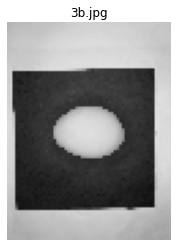

In [6]:
Ind = 5
img= x_original[Ind]
plt.axis("off")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.title(img_name[Ind])

In [7]:
'''
for name in img_name:
  if(name[-5]=='a'):
    print(name)
'''

"\nfor name in img_name:\n  if(name[-5]=='a'):\n    print(name)\n"

In [8]:
name_down=[]  # down representa as frutas deitadas
original_down = [] 
name_up=[] # down representa as frutas em pe
original_up= [] 

In [9]:
k = 0
for name in img_name:
  if(name[-5]=='a'):
    name_up.append(name)
    original_up.append(x_original[k])
  else:
    name_down.append(name)
    original_down.append(x_original[k])
  k = k +1


In [10]:
# print(name_down) 
# print(name_up)

In [11]:
def get_dimension(img):
  im = img
  # Compute the Canny filter for two values of sigma
  edges1 = feature.canny(im)
  edges2 = feature.canny(im, sigma=3)
  nrows,ncols =edges2.shape
  Foto = np.ones((nrows,ncols))*255
  for i in range(nrows):
    for j in range(ncols):
      if edges2[i,j] == True:
        Foto[i,j]=0
  Foto = Foto.astype(int)
# calculo do raio horizontal
  Quadrado = []
  Raio = []
  for i in range(nrows):
    values = np.zeros(4)
    k = -1
    for j in range(1,ncols):
      if(Foto[i,j-1]==255 and Foto[i,j]==0):
        if(k<4):
          k = k+1
          values[k]=j
    L = values[3] - values[0]
    d = values[2] - values[1]
    Quadrado.append(L)
    Raio.append(d)
  L = np.array(Quadrado).max()
  Raio = np.array(Raio).max()
  medida = Raio/L*14.5
  # medida = 11.711538461538462
  return medida


In [13]:
Ind = 5
img= original_down[Ind]
medida = get_dimension(img)
print('raio horizontal=',medida)
img = img.transpose()
medida = get_dimension(img)
print('raio vertical=',medida)

raio horizontal= 11.711538461538462
raio vertical= 8.529411764705882


In [14]:
Ind = 5
img= original_up[Ind]
medida = get_dimension(img)
print('raio horizontal=',medida)
img = img.transpose()
medida = get_dimension(img)
print('raio vertical=',medida)

raio horizontal= 10.596153846153845
raio vertical= 7.960784313725491


In [ ]:
# raio horizontal= 11.711538461538462